#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing dataset

In [2]:
dd = pd.read_csv(r"C:\Users\hi\Desktop\Innomatics\Sample Docs for practice\car_df_EDA.csv")

In [3]:
dd.head()   ## First 5 rows of columns

,Unnamed: 0.1,Unnamed: 0,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,dohc,four,130.0,mpfi,9.0,111,5000,21,27,13495
1,1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,dohc,four,130.0,mpfi,9.0,111,5000,21,27,16500
2,2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,ohcv,six,152.0,mpfi,9.0,154,5000,19,26,16500
3,3,4,audi,gas,std,four,sedan,fwd,front,99.8,...,ohc,four,109.0,mpfi,10.0,102,5500,24,30,13950
4,4,5,audi,gas,std,four,sedan,4wd,front,99.4,...,ohc,five,136.0,mpfi,8.0,115,5500,18,22,17450


In [4]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       208 non-null    int64  
 1   Unnamed: 0         208 non-null    int64  
 2   make               208 non-null    object 
 3   fuel_type          208 non-null    object 
 4   aspiration         208 non-null    object 
 5   num_of_doors       208 non-null    object 
 6   body_style         208 non-null    object 
 7   drive_wheels       208 non-null    object 
 8   engine_location    208 non-null    object 
 9   wheel_base         206 non-null    float64
 10  length             208 non-null    float64
 11  width              208 non-null    float64
 12  height             208 non-null    float64
 13  curb_weight        208 non-null    int64  
 14  engine_type        207 non-null    object 
 15  num_of_cylinders   208 non-null    object 
 16  engine_size        206 non

**Representation of above data**

1) There are 208 rows and 24 columns.
2) Out of 24, 6 columns has float64, 5 columns has int64, 13 columns has Object datatype with memory size 39.1KB
3) wheel_base has 2 missing values, engine_type has 1 missing value, engine_size has 2 missing values, price has 4 missing values.

In [5]:
dd.describe()

,Unnamed: 0.1,Unnamed: 0,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,208.000000,208.000000,206.000000,208.000000,208.000000,208.000000,208.000000,206.000000,208.000000,208.000000,208.000000
mean,103.456731,104.456731,98.919903,174.262019,65.950962,53.750481,2563.375000,127.543689,10.194808,25.158654,30.668269
std,60.115573,60.115573,6.121266,12.373790,2.159419,2.435010,521.034018,41.599197,4.044135,6.528187,6.873639
min,0.000000,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,51.750000,52.750000,94.500000,166.675000,64.100000,52.000000,2163.000000,98.000000,8.600000,19.000000,25.000000
50%,103.500000,104.500000,97.000000,173.200000,65.500000,54.100000,2422.500000,120.000000,9.000000,24.000000,30.000000
75%,155.250000,156.250000,102.400000,183.775000,66.900000,55.500000,2959.250000,145.000000,9.400000,30.000000,34.000000
max,204.000000,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


**Representation**

Above descirbes the statistical measures of numerical data where we can see minimum , maximum and (25,50,75)% of Quantiles.

## Data Cleaning

#### Duplicate values

In [6]:
dd[dd.duplicated()]

,Unnamed: 0.1,Unnamed: 0,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
205,202,203,volvo,gas,std,four,sedan,rwd,front,109.1,...,ohcv,six,173.0,mpfi,8.8,134,5500,18,23,21485
206,203,204,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,ohc,six,145.0,idi,23.0,106,4800,26,27,NaN
207,204,205,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,ohc,four,141.0,mpfi,9.5,114,5400,19,25,22625


In [7]:
dd.drop_duplicates(keep = 'first', inplace = True)

In [8]:
dd.duplicated().sum()

0

**Representation**

1) There are 3 duplicate entries in the data.
2) Removed those 3 duplicates

## Structural errors

In [9]:
dd.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [10]:
dd.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1, inplace = True)

**Representation**
Dropping of unwanted columns "Unnamed: 0.1", "Unnamed: 0" as they have only serial numbers but dont indicate any true data.

In [11]:
dd.columns

Index(['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style',
       'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'compression_ratio', 'horsepower',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

**To find the structural errors**
1) if data type is categorical -- unique()
2) if data type is numerical  -- apply function

In [12]:
## Check every column for if there are any structural errors

In [13]:
dd['num_of_doors'].dtype

dtype('O')

In [14]:
dd['num_of_doors'].unique()

array(['two', 'four', '?'], dtype=object)

In [15]:
def door(n):
    if n == 'two':
        return 2
    elif n == 'four':
        return 4
    else:
        return np.nan

dd['num_of_doors'] = dd['num_of_doors'].apply(door)

In [16]:
dd['num_of_doors'].unique()

array([ 2.,  4., nan])

In [17]:
dd['num_of_doors'].dtype

dtype('float64')

In [18]:
dd['num_of_cylinders'].dtype

dtype('O')

In [19]:
dd['num_of_cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [20]:
def cyl(n):
    if n == 'four':
        return 4
    elif n == 'six':
        return 6
    elif n == 'five':
        return 5
    elif n == 'three':
        return 3
    elif n == 'twelve':
        return 12
    elif n == 'two':
        return 2
    else:
        return 8

dd['num_of_cylinders'] = dd['num_of_cylinders'].apply(cyl)

In [21]:
dd['num_of_cylinders'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

**Representation**

For above two columns "num_of_cylinders" and "num_of_doors" converted object to integer/float as the original data indicates discrete data.

In [22]:
dd['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [23]:
dd['horsepower'] = dd['horsepower'].replace(r'[?]',np.nan,regex = True).astype('float16')

In [24]:
dd['horsepower'].unique()

array([111., 154., 102., 115., 110., 140., 160., 101., 121., 182.,  48.,
        70.,  68.,  88., 145.,  58.,  76.,  60.,  86., 100.,  78.,  90.,
       176., 262., 135.,  84.,  64., 120.,  72., 123., 155., 184., 175.,
       116.,  69.,  55.,  97., 152., 200.,  95., 142., 143., 207., 288.,
        nan,  73.,  82.,  94.,  62.,  56., 112.,  92., 161., 156.,  52.,
        85., 114., 162., 134., 106.], dtype=float16)

In [25]:
dd['horsepower'].dtype

dtype('float16')

In [26]:
dd['peak_rpm'].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', '?', '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [27]:
dd['peak_rpm'] = dd['peak_rpm'].replace(r'[?]', np.nan, regex = True).astype('float16')

In [28]:
dd['peak_rpm'].dtype

dtype('float16')

In [29]:
dd['price'].unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '?', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', nan, '35550', '36000', '5195',
       '6095', '6795', '6695', '7395', '10945', '11845', '13645', '15645',
       '8495', '10595', '10245', '10795', '11245', '18280', '18344',
       '25552', '28248', '28176', '31600', '34184', '35056', '40960',
       '45400', '16503', '5389', '6189', '6669', '7689', '9959', '8499',
       '12629', '14869', '14489', '6989', '8189', '9279', '5499', '7099',
       '6649', '6849', '7349', '7299', '7799', '7499', '7999', '8249',
       '8949', '9549', '13499', '14399', '17199', '19699', '18399',
       '11900', '13200', '12440', '13860', '15580', '16695', '170

In [30]:
dd['price'] = dd['price'].replace(r'[?]', np.nan, regex = True).astype('float16')

In [31]:
dd["price"].dtype

dtype('float16')

**Representation**

Above 3 columns has invalid data in form of special character, hence replaing them with "nan" and converted to float as float data type accepts "nan" value and the original data is numerical data but the datatype is mentioned as Object because of special characters.

### Treating missing values

In [32]:
dd.isna().sum()

make                 0
fuel_type            0
aspiration           0
num_of_doors         2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           2
length               0
width                0
height               0
curb_weight          0
engine_type          1
num_of_cylinders     0
engine_size          2
fuel_system          0
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                7
dtype: int64

In [33]:
dd['num_of_doors']

0      2.0
1      2.0
2      2.0
3      4.0
4      4.0
      ... 
200    4.0
201    4.0
202    4.0
203    4.0
204    4.0
Name: num_of_doors, Length: 205, dtype: float64

In [34]:
dd['num_of_doors'].fillna(dd['num_of_doors'].median(), inplace = True)

In [35]:
dd['wheel_base'].fillna(dd['wheel_base'].median(), inplace = True)

In [36]:
dd['engine_type'].fillna(dd['engine_type'].mode()[0], inplace = True)

In [37]:
dd['engine_size'].fillna(dd['engine_size'].median(), inplace = True)

In [38]:
dd['horsepower'].fillna(dd['horsepower'].median(), inplace = True)

In [39]:
dd['peak_rpm'].fillna(dd['peak_rpm'].median(), inplace = True)

In [40]:
dd['price'].fillna(dd['price'].median(), inplace = True)

**Representation**

After treating structural errors, found 7 columns has missing values and filled those missing values with statistical measures.

# Univariate Analysis 

<Axes: >

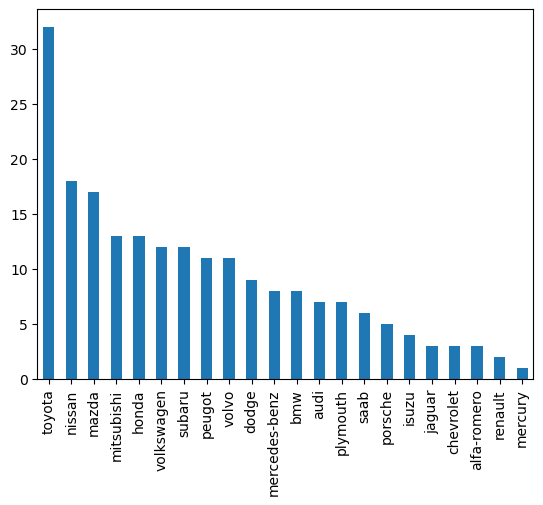

In [41]:
dd["make"].value_counts().plot(kind = 'bar')

<Axes: ylabel='Percentage'>

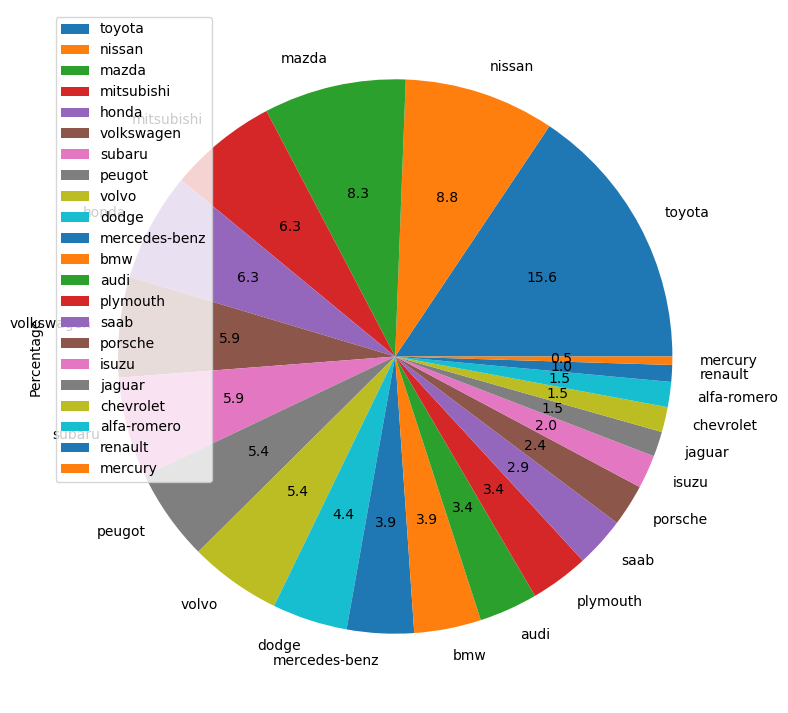

In [47]:
dd["make"].value_counts().plot(kind = 'pie', ylabel = 'Percentage', autopct = '%1.1f',legend = True, figsize = (9,9))

**Representation**
1) x-axis represents 'make', and y-axis represent count.
2) Here 'make' represents car companies. Out of 208 cars highest number of cars belong to 'toyota' with 30+ cars and least number belongs to 'mercury' with less than 5 cars.
3) Except 'toyota' all other companies have below 20 cars.
4) Pie chart represent the percentage of the cars, each companies owns.

<Axes: xlabel='fuel_type', ylabel='count'>

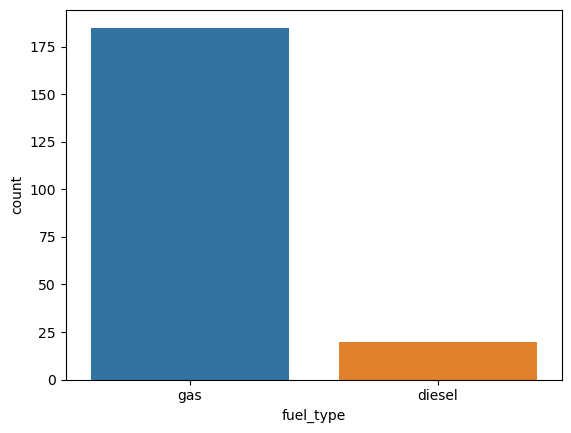

In [42]:
sns.countplot(data = dd, x = 'fuel_type')

<Axes: ylabel='Percentage'>

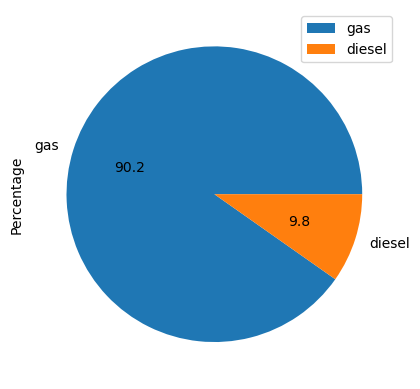

In [48]:
dd["fuel_type"].value_counts().plot(kind = 'pie', ylabel = 'Percentage', autopct = '%1.1f',legend = True)

**Representation**

1) There 2 types of fuel, "Gas" and "Diesel".
2) "Gas" as fuel type with has more cars with count of 175+.
3) Pie chart represents 90.2% of cars run with "gas", and 9.8% cars run with "diesel".

<Axes: >

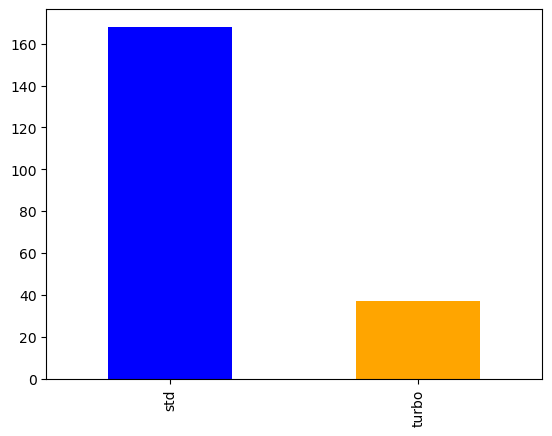

In [54]:
dd["aspiration"].value_counts().plot(kind = 'bar', color = ['blue','orange'])

<Axes: ylabel='Percentage'>

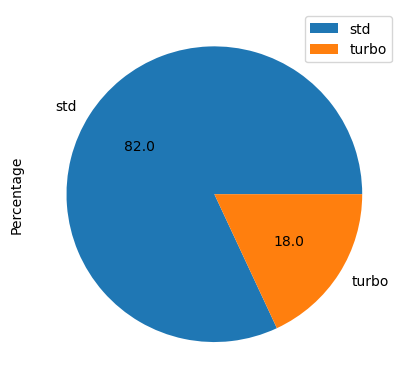

In [43]:
dd["aspiration"].value_counts().plot(kind = 'pie', ylabel = 'Percentage', autopct = '%1.1f',legend = True)

**Representation**

1) Aspirantion in cars means way of air intake into the engine.
2) There are 2 types of aspiration model. Std- standard model has cars more than 160 and other model is Turbo has cars less than 40.
3) 82% of cars has standard model aspiration engine and 18% of cars has Turbo model engine.

<Axes: ylabel='Frequency'>

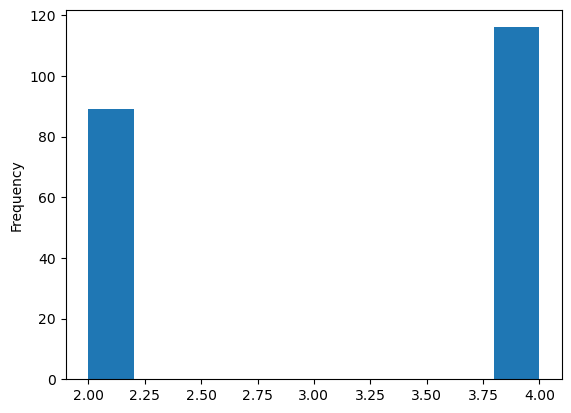

In [44]:
dd["num_of_doors"].plot(kind = 'hist', xlabel = "No of doors")

**Representation**
1) x-axis represent number of doors, y-axis represent count of cars.
2) There are 2 differences in no.of doors. one is 2 door model and 4 door model.
3) Around 80+ cars are have only 2 doors. Near to 120 cars have 4 doors.
4) The data is not normally distributed.

<Axes: >

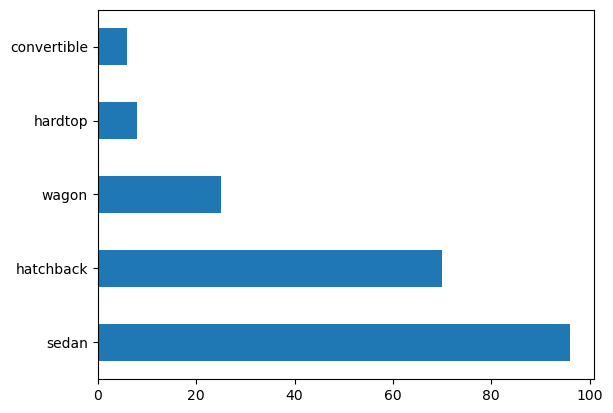

In [56]:
dd["body_style"].value_counts().plot(kind = 'barh', )

<Axes: ylabel='Percentage'>

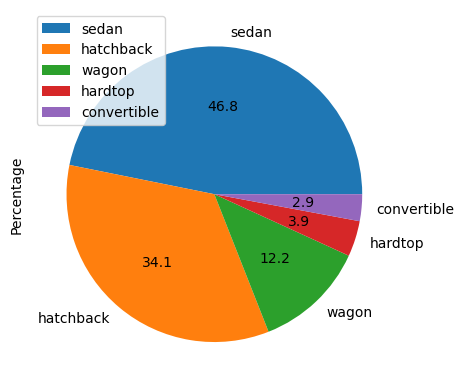

In [57]:
dd["body_style"].value_counts().plot(kind = 'pie', ylabel = 'Percentage', autopct = '%1.1f',legend = True)

**Representation**
1) The x-axis is number of cars and y-axis is the body style.
2) Pie chart represents the percentage of the cars as per body style.
3) "Sedan" style has more than 90 cars and posses 46.8% share from whole.
4) "Convertible" style has least no.of cars with less than 10 cars and posses 2.9% share of whole.

<Axes: xlabel='drive_wheels', ylabel='count'>

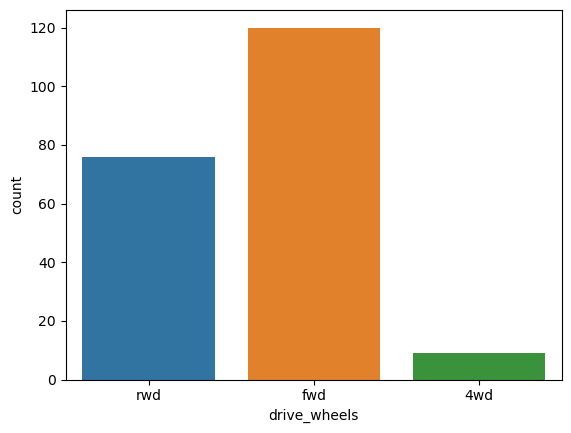

In [59]:
sns.countplot(data = dd, x = "drive_wheels")

<Axes: ylabel='drive_wheels'>

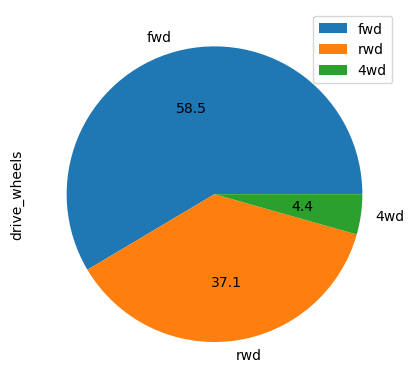

In [61]:
dd["drive_wheels"].value_counts().plot(kind = 'pie', autopct = '%1.1f', legend = True)

**Representation**
1) x-axis represent type of wheel drive, there are 3 types of it.
2) Pie chart has percent of each wheel drive type and 'fwd' hold major share with 58.5% and '4wd' has least share with 4.4%.
3) In terms of count 'fwd' has near 120 cars, 'rwd' has near to 80 cars and '4wd' has near to 10 cars.

<Axes: xlabel='engine_location', ylabel='count'>

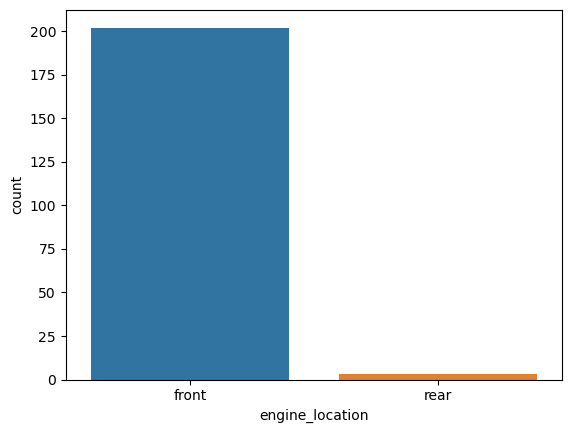

In [63]:
sns.countplot(data = dd, x = "engine_location")

<Axes: ylabel='engine_location'>

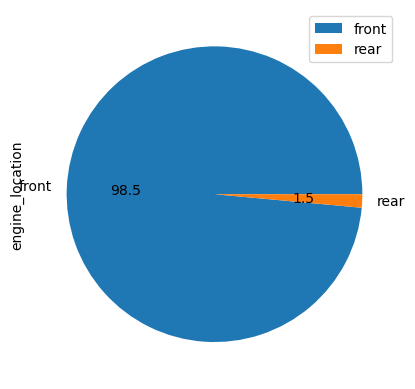

In [62]:
dd["engine_location"].value_counts().plot(kind = 'pie', autopct = '%1.1f', legend = True)

**Representation**
1) x-axis shows engine location and y-axis shows count of cars.
2) pie chart shows % of the cars with each engine location.
3) engine location 'front' has 200 cars possesing 98.5% and engine location 'rear' has 8 cars possesing 1.5%

<Axes: ylabel='Frequency'>

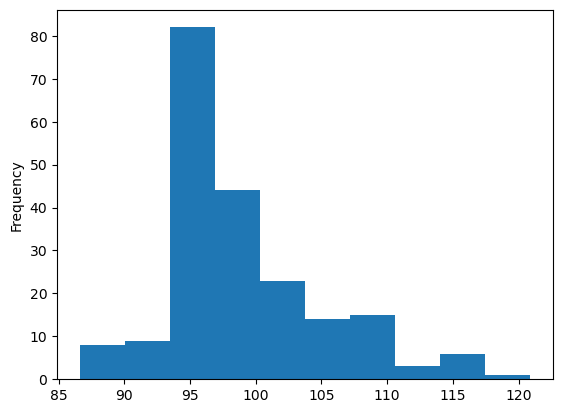

In [64]:
dd["wheel_base"].plot(kind = 'hist')

<Axes: >

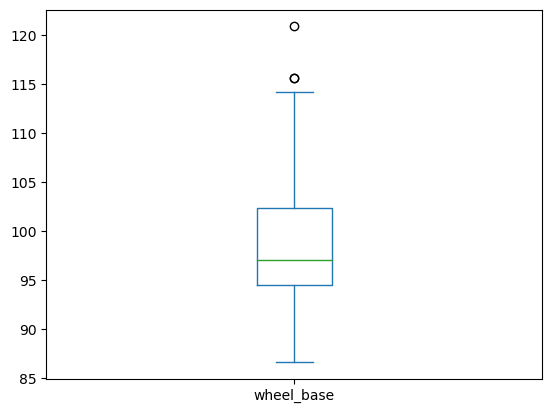

In [68]:
dd["wheel_base"].plot(kind = 'box')

**Representation**
1) x-axis shows wheel base in centimeters, y-axis shows frequency of cars.
2) Most no.of cars has wheel base around 95cms and least no.of cars has wheelbase of around 120cms.
3) Boxplot show there are 2 outliers at position 120 and 115 which is upper side of data. Retaining those outliers as those are True values.
4) This data is not normally distributed.

<Axes: ylabel='Frequency'>

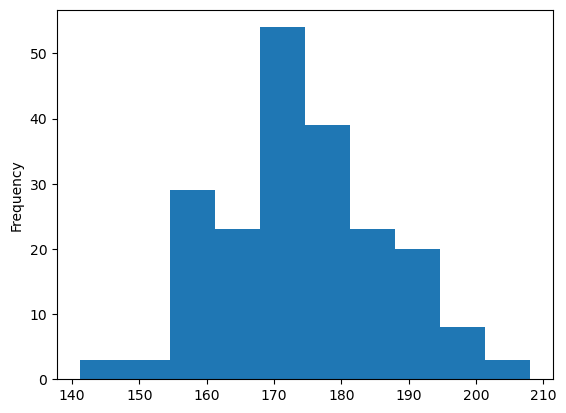

In [69]:
dd["length"].plot(kind = 'hist')

<Axes: >

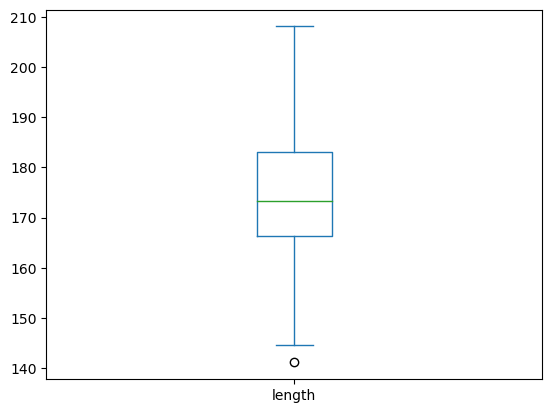

In [70]:
dd["length"].plot(kind = 'box')

**Representation**
1) x-axis shows total length of car in cms and y-axis shows frequency of cars.
2) Maximum frequency of cars (50+) belong to 170cms - 175cms.
3) As per boxplot there is only one outlier towards downside at point 140cms.
4) The Data is a Normal Distribution with slight deviation.

<Axes: ylabel='Frequency'>

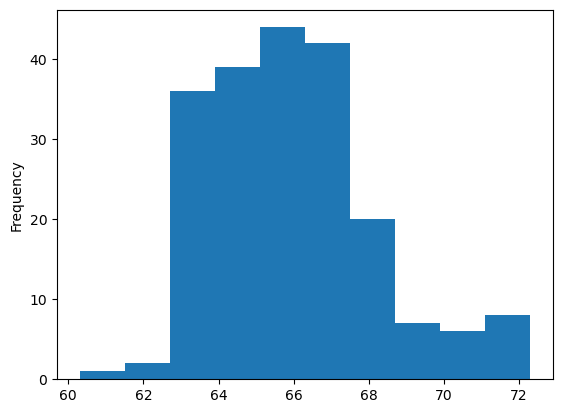

In [71]:
dd["width"].plot(kind = 'hist')

<Axes: >

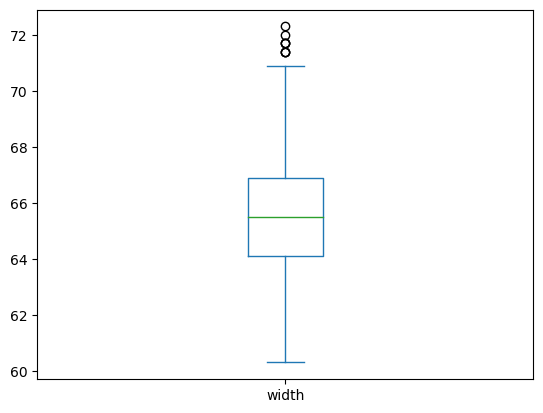

In [72]:
dd["width"].plot(kind = 'box')

<Axes: ylabel='Density'>

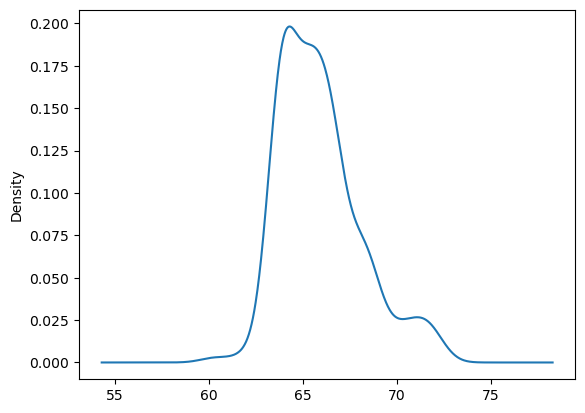

In [73]:
dd["width"].plot(kind = 'density')

**Representation**
1) x-axis shows width of car in cms, y-axis shows frequency.
2) Most cars has width between 63cms - 67 cms, where maximum frquency of cars is 40+ with width 66cms.
3) The data is following normal distrubition with 4 outliers towards upper whisker.

<Axes: ylabel='Frequency'>

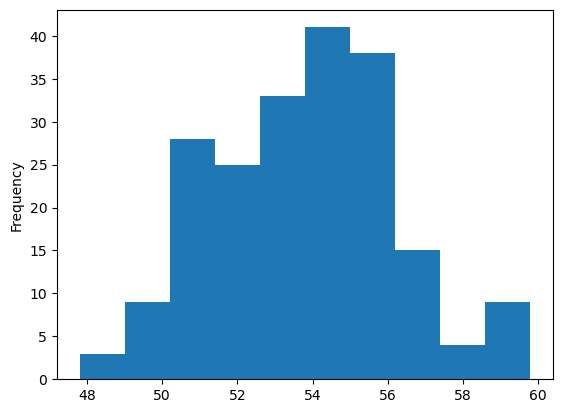

In [74]:
dd["height"].plot(kind = 'hist')

<Axes: >

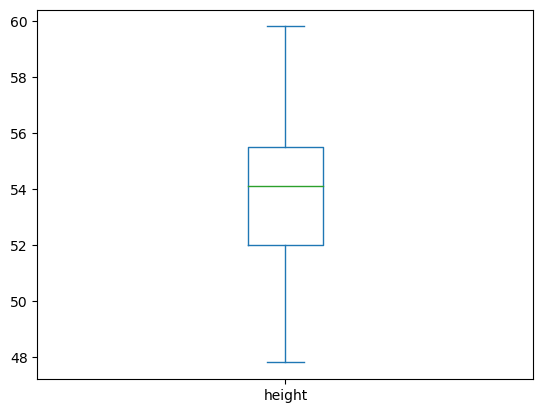

In [75]:
dd["height"].plot(kind = 'box')

**Representation**
1) x-axis showing heigth of car in cms and y-axis shows frequency of cars.
2) Maximum frequency of cars nearly 40 cars has height between 53cms and 57cms.
3) There are no outliers in height data and also it follows partial normal distribution.

<Axes: ylabel='Frequency'>

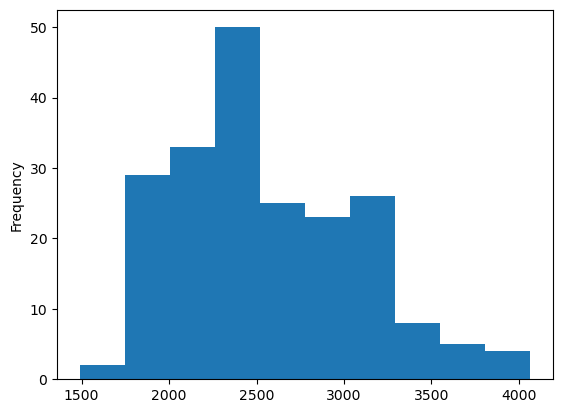

In [76]:
dd["curb_weight"].plot(kind= 'hist')

<Axes: >

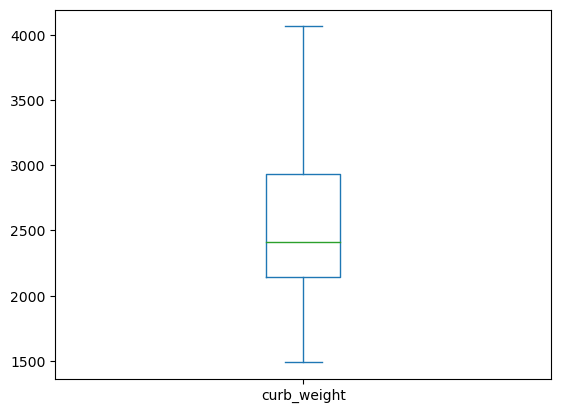

In [77]:
dd["curb_weight"].plot(kind= 'box')

**Representation**
1) x-axis shows weight of cars in kgs, y-axis shows frequency of cars.
2) Most of the cars has a weight of 2400kgs to 2500kgs. Low number of cars has weight of aroung 1500kgs.
3) There are not outliers for the weight data and the it doesn't follow normal distribution.


<Axes: xlabel='engine_type', ylabel='count'>

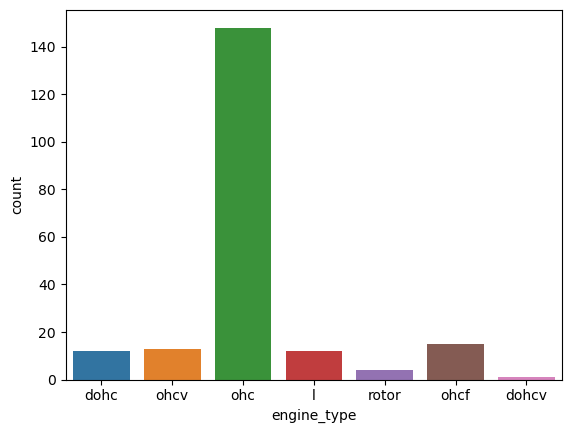

In [78]:
sns.countplot(data = dd, x = 'engine_type')

<Axes: ylabel='engine_type'>

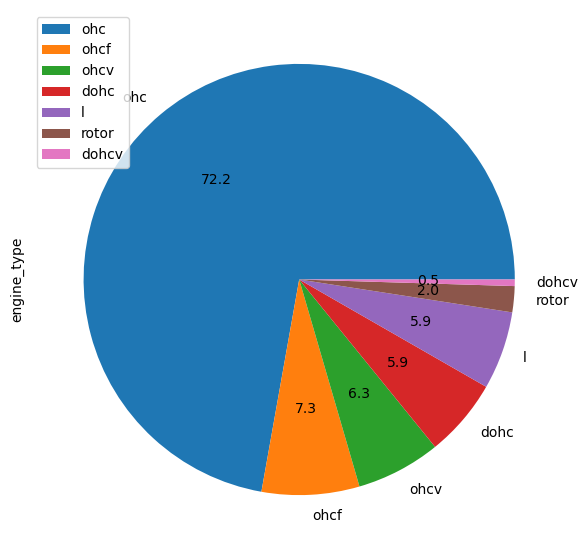

In [81]:
dd["engine_type"].value_counts().plot(kind = 'pie', autopct = '%1.1f', legend = True, figsize = (7,7))

**Representation**
1) x-axis represents model of the engine, y-axis shows count of cars.
2) 'OHC' model engine hold maximum cars with 140 count and least model engine corresponds to 'dohcv' less than 5 count.
3) Pie chart showing % of cars from total no.of cars. Highest is 72.2% and lest is 0.5%.

<Axes: ylabel='Frequency'>

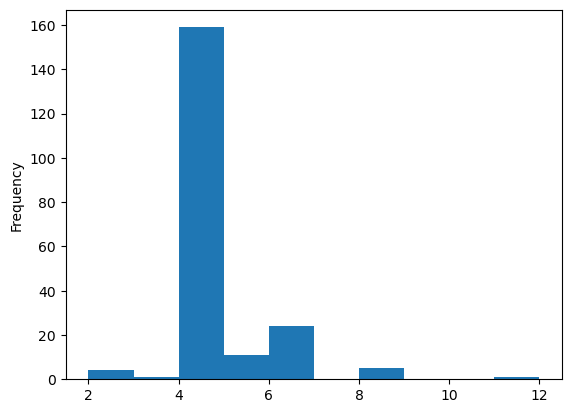

In [82]:
dd["num_of_cylinders"].plot(kind = 'hist')

<Axes: >

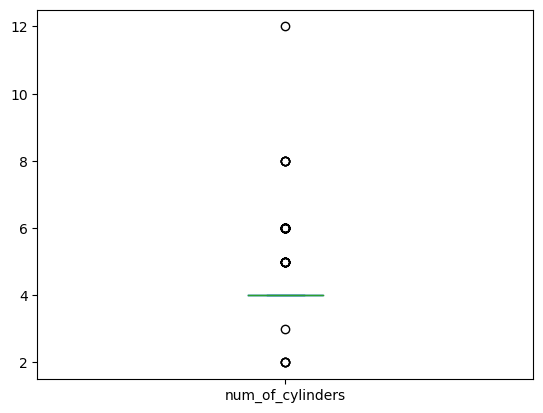

In [83]:
dd["num_of_cylinders"].plot(kind = 'box')

**Representation**
1) x-axis showing no.of cylinders and y axis showing frquency of cars.
2) 150+ frequency has 4 cylinders the highest follwed by 6 cylinders with frequency of 20.
3) Data is not following normal distribution.

<Axes: ylabel='Frequency'>

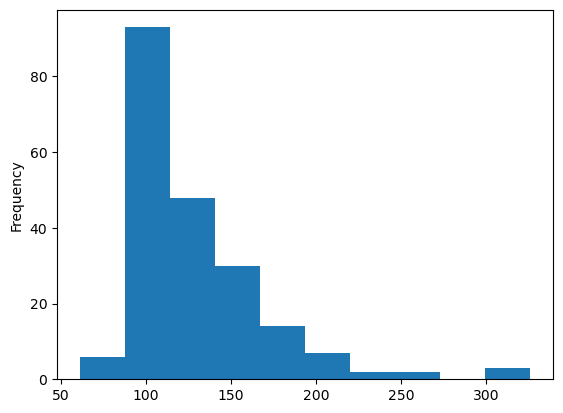

In [84]:
dd["engine_size"].plot(kind = 'hist')

<Axes: >

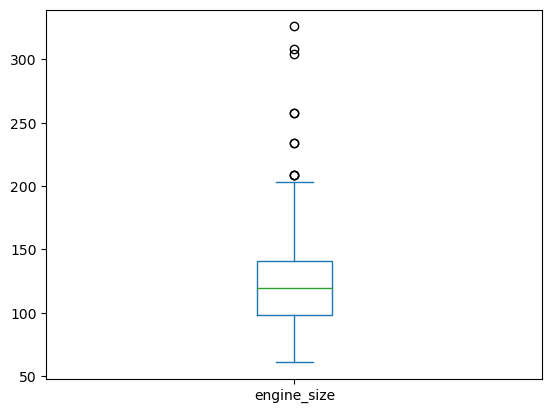

In [85]:
dd["engine_size"].plot(kind = 'box')

**Representation**
1) x-axis is showing the engine size in CC, and y-axis showing cars frequency.
2) Most cars are holding the size of 100 CC, there are least frequency of cars with 250CC.
3) There are multiple outliers and the data is not following normal distribution.

<Axes: >

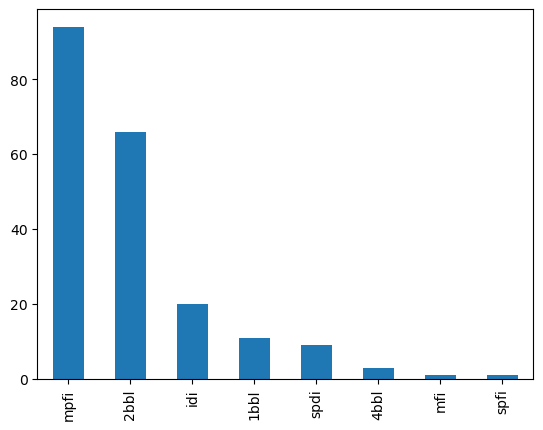

In [87]:
dd["fuel_system"].value_counts().plot(kind = 'bar')

<Axes: ylabel='fuel_system'>

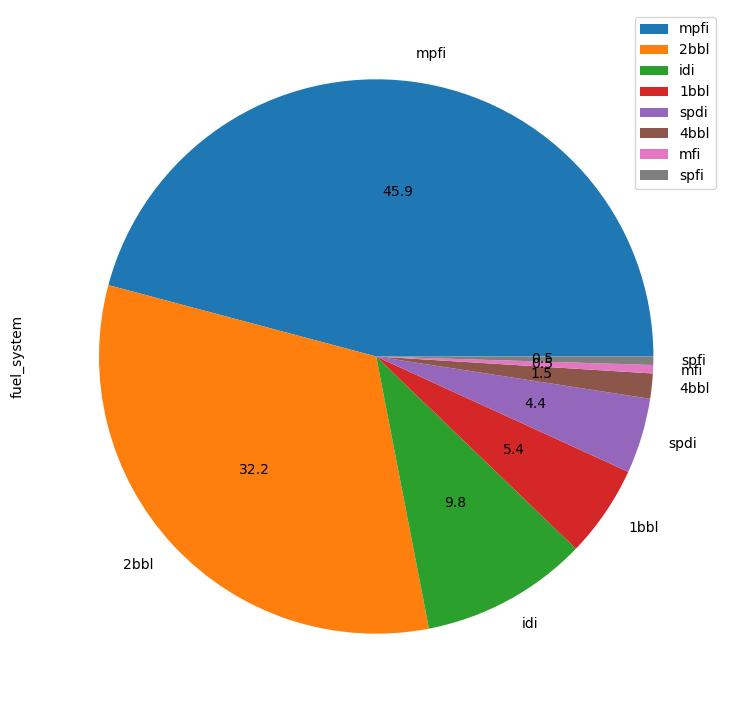

In [91]:
dd["fuel_system"].value_counts().plot(kind = 'pie', legend = True, autopct = '%1.1f' , figsize= (9,9))

**Representation**
1) x-axis is showing the fuel sytem model, and y-axis showing cars count.
2) Maximum cars (around 90+) has the fuel system model of 'mpfi' followed by '2bbl' fuel system model with around 60 cars.
3) Pie chart showing % of the total cars where 'mpfi' hold 45% share and '2bbl' holds 32.2%. Least share goes to 'spfi' and 'mfi' with 0.5% share each.

<Axes: ylabel='Frequency'>

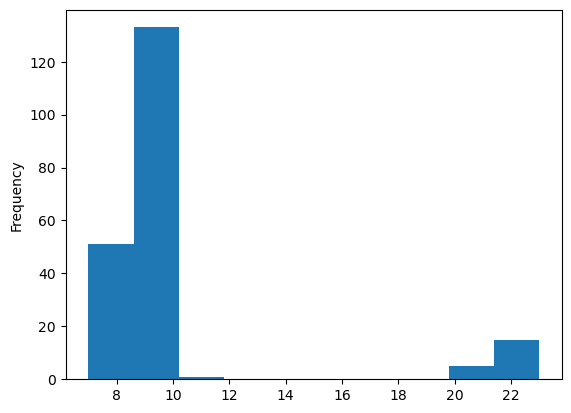

In [92]:
dd["compression_ratio"].plot(kind = 'hist')

<Axes: >

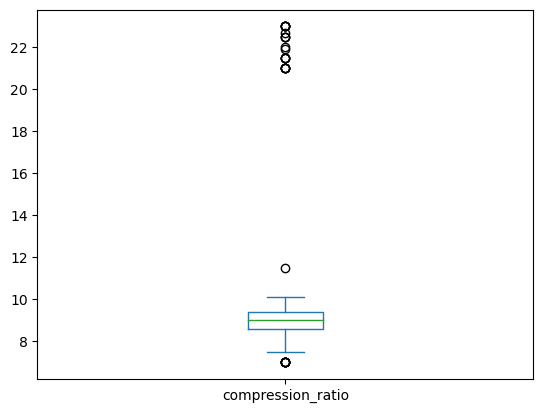

In [94]:
dd["compression_ratio"].plot(kind = 'box')

**Representation**
1) x-axis represent the compression ration ranging from 8- 23, y-axis showing frequency of cars.
2) 130+ cars has coression ratio around 10.
3) There are multiple outliers and is data is not following normal distribution.

<Axes: ylabel='Frequency'>

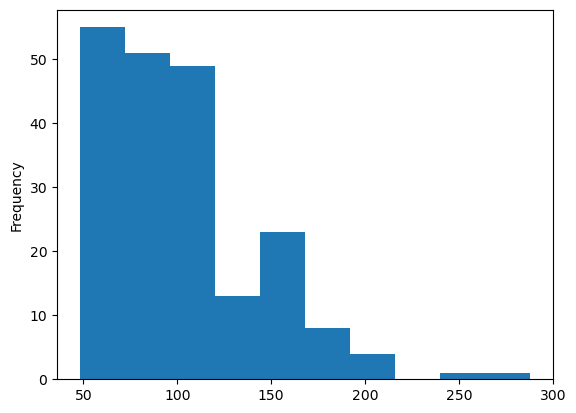

In [95]:
dd["horsepower"].plot(kind = 'hist')

<Axes: >

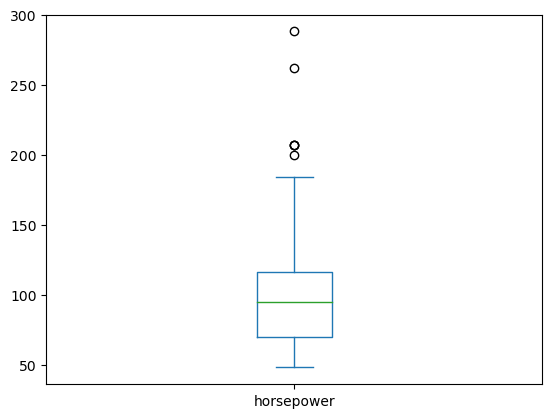

In [97]:
dd["horsepower"].plot(kind = 'box')

**Representation**
1) x-axis is showing horse power in watts, y-axis is showing cars.
2) Maximum cars are falling between 50watts to 125watts. Where 55 cars are ranging around 50watts.
3) There are 4 outliers and not following a normal distribution.

<Axes: ylabel='Frequency'>

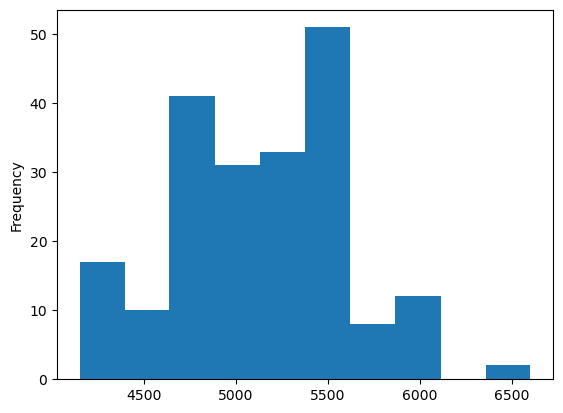

In [98]:
dd["peak_rpm"].plot(kind = 'hist')

<Axes: >

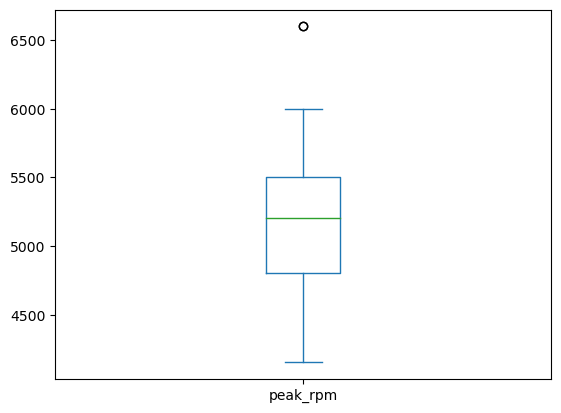

In [99]:
dd["peak_rpm"].plot(kind = 'box')

**Representation**
1) x-axis represent "peak rpm" of the car and y-axis showing no.of cars.
2) The range of rpm is 2000rpm to 6500rpm and maximum car (around 50 cars) have the 5500rpm and second maximum (around 40 cars) have rpm range between 4700-4800.
3) There is one outlier towards upper whisker at point 6500rpm and the data follows partial normal distribution.

<Axes: ylabel='Frequency'>

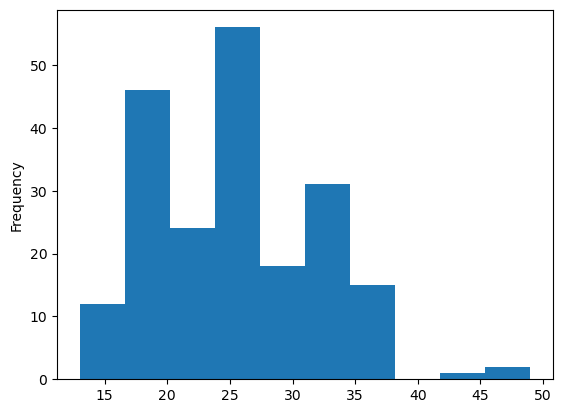

In [101]:
dd["city_mpg"].plot(kind = 'hist')

<Axes: >

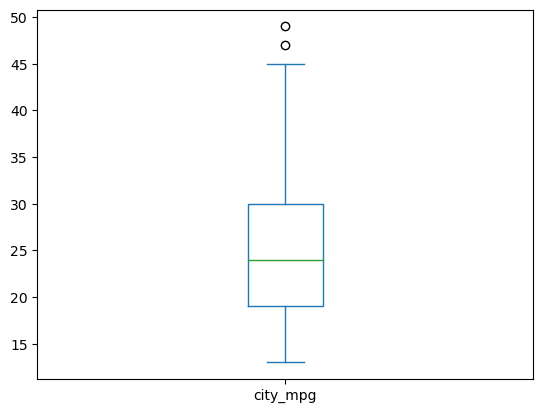

In [102]:
dd["city_mpg"].plot(kind = 'box')

**Representation**
1) x-axis represent mileage of car in city as kms per litre, y axis represent frequency of cars.
2) Around 55 cars are giving mileage of 25kmpl, and 45 cars are giving mileage of around 20 kmpl.
3) There are 2 outliers towards upper whisker between 45kmpl and 50kmpl.
4) The data is not following a normal distribution.

<Axes: ylabel='Frequency'>

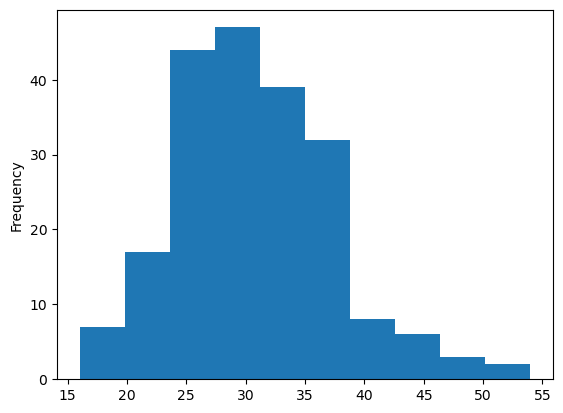

In [103]:
dd["highway_mpg"].plot(kind = 'hist')

<Axes: >

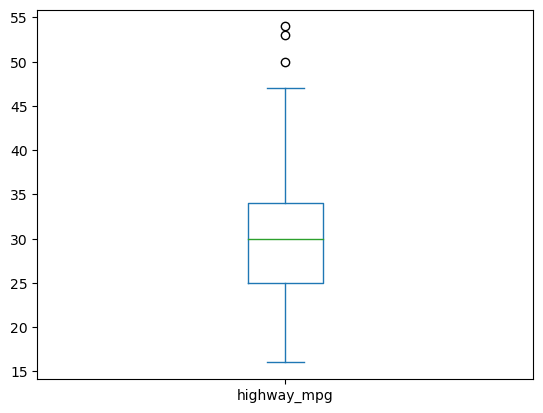

In [104]:
dd["highway_mpg"].plot(kind = 'box')

**Representation**
1) x-axis represent mileage of car on Highway as kms per litre, y axis represent frequency of cars.
2) Around 45+ cars are giving mileage of 30kmpl, and 43 cars are giving mileage of around 25 kmpl.
3) There are 3 outliers towards upper whisker between 50kmpl and 55kmpl.
4) The data is not following a normal distribution.

<Axes: ylabel='Frequency'>

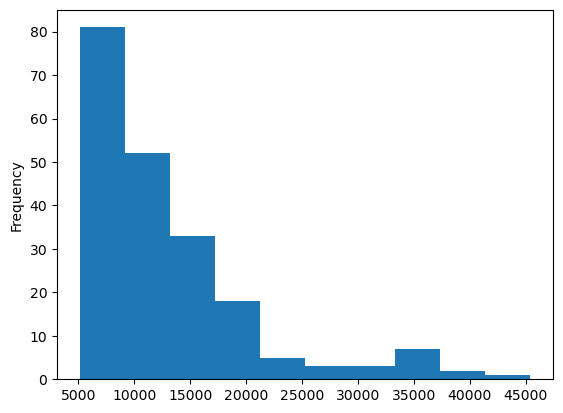

In [105]:
dd["price"].plot(kind = 'hist')

<Axes: >

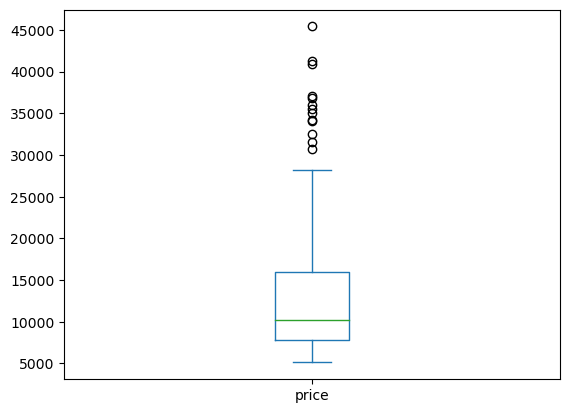

In [106]:
dd["price"].plot(kind = 'box')

**Representation**
1) x-axis showing price of the cars ranging from 5000 USD to 45000 USD, y-axis is frequency of cars.
2) Around 80 cars are priced between 5000 USD and 10000 USD. Less than 5 cars are priced between 40000 USD and 45000 USD.
3) 50 cars are priced between 10000 USD and 15000 USD.
4) There are multiple outliers above the upper whisker, i.e above 30000 USD. There is not normal distribution.

# Bivariate Analysis

<Axes: xlabel='body_style', ylabel='count'>

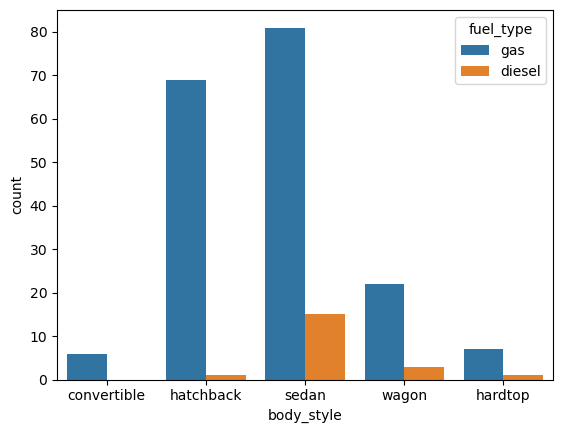

In [107]:
sns.countplot(data = dd,x = 'body_style', hue = 'fuel_type')

**Representation**
1) x-axis showing fuel type based on body style, y-axis showing count of cars.
2) Sedan model has highest number of gas cars follwed by hatchback. Convertible has not least number of gas cars.
3) Sedan model stand highest in deisel cars also followed by wagon. Convertible has no deisel cars, and second least number of deisel cars are for hatchback.

<Axes: xlabel='wheel_base', ylabel='length'>

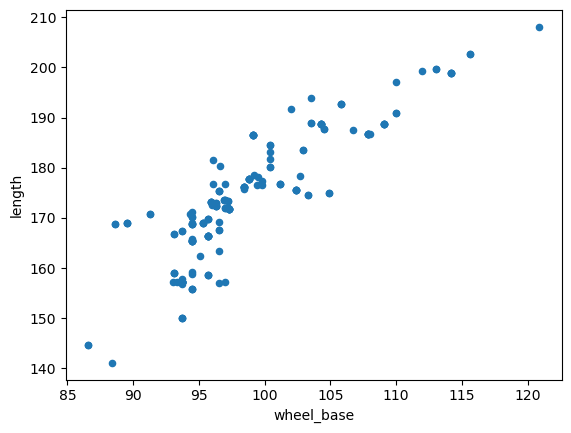

In [108]:
dd.plot('wheel_base','length',kind = 'scatter')

**Representation**
1) Wheel base and length are positively and strongly correlated.
2) That means, when wheel base increase, length also increases, when wheelbase decrease, length also decreases.

In [109]:
dd.groupby(by = "engine_type")["price"].median()

engine_type
dohc     15876.0
dohcv    10224.0
l        14720.0
ohc       9268.0
ohcf      9232.0
ohcv     19696.0
rotor    12748.0
Name: price, dtype: float64

**Representation**
1) Categorical variable is engine_type and numerical variable is price.
2) The median price of different engine_types is represent above.
3) Max median price goes to 'ohcv' model, least median price goes to 'ohcf' model.

# Multivariate

<Axes: >

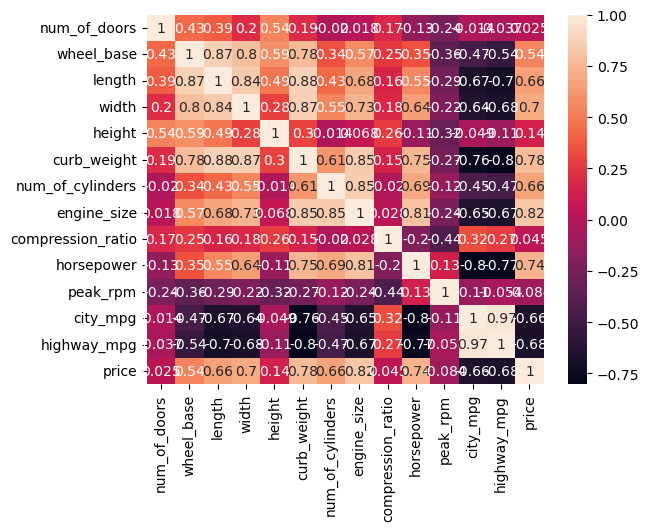

In [110]:
sns.heatmap(dd.corr(numeric_only = True), annot = True)

**Representation**
1) The corelation is ranging from -0.75 to 1 where -0.75 is represented in darker shade and 1 is represented in lighter shade.
2) 0.9 - 1 means perfect positive corelation. 0.7-0.9 means strong positive corelation. 0.5-0.7 means moderate positive corelated. 0- 0.5 is weak positive corelated.
3) The value below 0 is negatively corelated.

# Data Manipulation

1) What is the maximum price of audi car?

In [118]:
dd[dd['make'] == 'audi']['price'].max()

23870.0

2) What is minimum number of cylinders in hatchback?

In [120]:
dd[dd["body_style"] == 'hatchback']["num_of_cylinders"].min()

2

3) Which fuel system is used most for Gas fuel type?

In [123]:
dd[dd["fuel_type"] == 'gas']["fuel_system"].mode()[0]

'mpfi'